In [1]:
import umap
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(context="paper", style="white")

In [3]:
mnist = fetch_openml("mnist_784", version=1)

In [4]:
mnist.data[0][:4]

array([0., 0., 0., 0.])

In [5]:
np.shape(mnist.data)

(70000, 784)

In [6]:
# with pickle
import pickle

f_name = 'saving_example.sav'
# time passes
loaded_model = pickle.load((open(f_name, 'rb')))
print(type(loaded_model))
# <class 'umap.umap_.UMAP'>

<class 'umap.umap_.UMAP'>


In [7]:
loaded_model._sparse_data

False

In [8]:
reducer = umap.UMAP(random_state=42,  verbose=True)

In [9]:
#reducer.fit(mnist.data[:10])

In [10]:
umap.__version__

'0.4.0rc1'

In [11]:
sigmas, rhos = umap.umap_.smooth_knn_dist(loaded_model._knn_indices, loaded_model.n_neighbors, loaded_model.local_connectivity)

In [12]:
reducer.embedding_ = loaded_model.embedding_
reducer.graph_ = loaded_model.graph_#.toarray()
reducer._sparse_data = loaded_model._sparse_data
reducer._raw_data = loaded_model._raw_data
reducer._a = loaded_model._a
reducer._b = loaded_model._b
reducer.n_epochs = loaded_model.n_epochs
reducer.metric = loaded_model.metric
reducer.repulsion_strength = loaded_model.repulsion_strength
reducer._initial_alpha = loaded_model._initial_alpha
reducer.negative_sample_rate = loaded_model.negative_sample_rate
reducer._metric_kwds = loaded_model._metric_kwds
reducer._sigmas = sigmas
reducer._rhos = rhos

In [36]:
reducer._input_hash = loaded_model._input_hash
reducer._small_data = loaded_model._small_data
reducer._rp_forest = loaded_model._rp_forest
reducer._n_neighbors = loaded_model._n_neighbors
reducer._distance_func = loaded_model._distance_func
reducer._search_graph = loaded_model._search_graph

In [37]:
np.shape(mnist.data[:10])

(10, 784)

In [39]:
#z = reducer.transform(mnist.data[:10])

In [69]:
loaded_model.embedding_[:3]

array([[ 0.5264052 , -1.2105161 ],
       [12.6892805 ,  0.13754378],
       [-2.077842  ,  8.564555  ]], dtype=float32)

In [13]:
trans = reducer.inverse_transform(loaded_model.embedding_[:3])

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


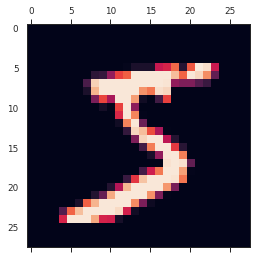

In [42]:
plt.matshow(mnist.data[0].reshape(28,28))

/home/AD/tsainbur/anaconda3/envs/tf1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/AD/tsainbur/anaconda3/envs/tf1/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


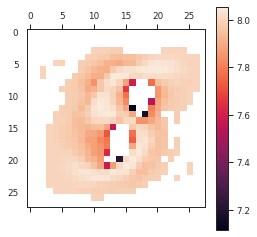

In [78]:
plt.matshow(np.log(trans[0]).reshape(28,28))#, vmax = 1)
plt.colorbar()

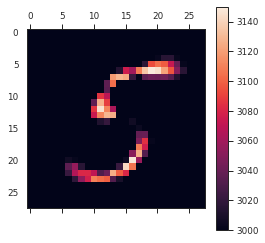

In [67]:
plt.matshow(trans[0].reshape(28,28), vmin=3000)#, vmax = 1)
plt.colorbar()

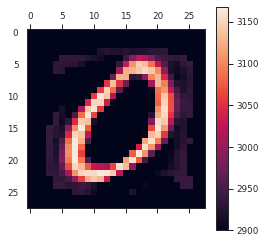

In [73]:
plt.matshow(trans[1].reshape(28,28), vmin=2900)#, vmax = 1)
plt.colorbar()

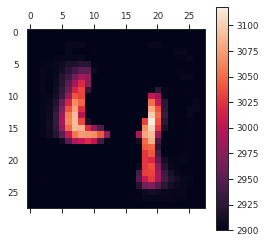

In [74]:
plt.matshow(trans[2].reshape(28,28), vmin=2900)#, vmax = 1)
plt.colorbar()

In [71]:
np.shape(trans)

(3, 784)

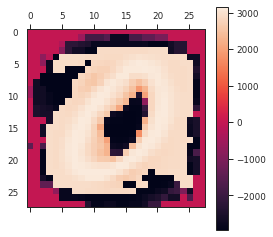

In [76]:
plt.matshow(trans[1].reshape(28,28))#, vmin=2900)#, vmax = 1)
plt.colorbar()